Training Accuracy: 100.00%
Testing Accuracy: 99.17%
Accuracy Difference (Train - Test): 0.83%

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.99      0.98      0.99       159
           2       0.99      1.00      0.99       148
           3       1.00      0.98      0.99       121
           4       0.99      1.00      1.00       134
           5       1.00      0.98      0.99       121
           6       0.99      0.99      0.99       142
           7       1.00      0.99      1.00       143
           8       0.99      1.00      1.00       152
           9       0.97      1.00      0.99       155
          10       0.99      0.99      0.99       133
          11       0.99      0.99      0.99       137
          12       0.99      1.00      1.00       135

    accuracy                           0.99      1680
   macro avg       0.99      0.99      0.99      1680
weighted avg       0.99      0.99      0.99      1680



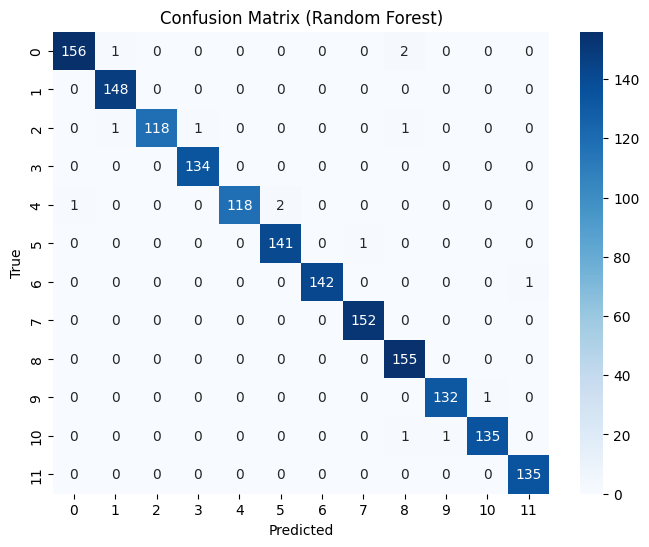


Cross-validation and Model Performance Summary:
           Model  Training Accuracy  Testing Accuracy  Accuracy Difference
0  Random Forest              100.0         99.166667             0.833333


In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Cleaned.csv') 

# Separate features and labels
features = df.drop(columns=['target'])
labels = df['target']  


# Split the data 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Model Evaluation
# Training Set
rf_train_predictions = rf.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)

# Evaluate on Test Set
rf_test_predictions = rf.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)

# Print Accuracy for Both Training and Test Set
print(f"Training Accuracy: {rf_train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {rf_test_accuracy * 100:.2f}%")

# Check for Overfitting
accuracy_difference = rf_train_accuracy - rf_test_accuracy
print(f"Accuracy Difference (Train - Test): {accuracy_difference * 100:.2f}%")

# Classification Report for Test Set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, rf_test_predictions))

# Confusion Matrix for Test Set
conf_matrix = confusion_matrix(y_test, rf_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Summary Table
cv_summary = {
    'Model': ['Random Forest'],
    'Training Accuracy': [rf_train_accuracy * 100],
    'Testing Accuracy': [rf_test_accuracy * 100],
    'Accuracy Difference': [accuracy_difference * 100]
}
cv_summary_df = pd.DataFrame(cv_summary)
print("\nCross-validation and Model Performance Summary:")
print(cv_summary_df)


In [6]:
# Save the trained model using pickle
model_filename = 'RF.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(rf, model_file)